<a href="https://colab.research.google.com/github/mahsoosalimi/100DaysOfCV/blob/main/05_Image_Segmentation_Seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Segmentation by Positioning a Seed**


In [1]:
import cv2
import numpy as np
from random import randint

import matplotlib.pyplot as plt

%matplotlib inline
from google.colab import drive

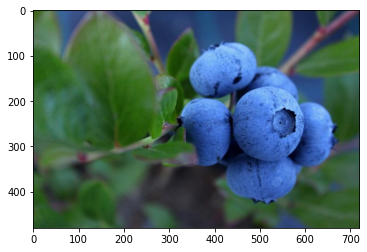

In [5]:
# read an image
img = cv2.imread('./Blueberry1.jpeg')

show_img = np.copy(img)

seeds = np.full(img.shape[0:2], 0, np.int32)
segmentation = np.full(img.shape, 0, np.uint8)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
n_seeds = 9

colors = []
for m in range(n_seeds):
    colors.append((255 * m / n_seeds, randint(0, 255), randint(0, 255)))

mouse_pressed = False
current_seed = 1
seeds_updated = False

In [7]:
def mouse_callback(event, x, y, flags, param):
    global mouse_pressed, seeds_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        cv2.circle(seeds, (x, y), 5, (current_seed), cv2.FILLED)
        cv2.circle(show_img, (x, y), 5, colors[current_seed - 1], cv2.FILLED)
        seeds_updated = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            cv2.circle(seeds, (x, y), 5, (current_seed), cv2.FILLED)
            cv2.circle(show_img, (x, y), 5, colors[current_seed - 1], cv2.FILLED)
            seeds_updated = True

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False

In [ ]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    plt.imshow('segmentation', segmentation)
    plt.imshow('image', show_img)
        
    k = cv2.waitKey(1)

    if k == 27:
        break
    elif k == ord('c'):
        show_img = np.copy(img)
        seeds = np.full(img.shape[0:2], 0, np.int32)
        segmentation = np.full(img.shape, 0, np.uint8)
    elif k > 0 and chr(k).isdigit():
        n = int(chr(k))
        if 1 <= n <= n_seeds and not mouse_pressed:
            current_seed = n
    
    if seeds_updated and not mouse_pressed:        
        seeds_copy = np.copy(seeds)
        cv2.watershed(img, seeds_copy)
        segmentation = np.full(img.shape, 0, np.uint8)
        for m in range(n_seeds):
            segmentation[seeds_copy == (m + 1)] = colors[m]
        
        seeds_updated = False
        
cv2.destroyAllWindows()